<h1 style="text-align: center;">Final Project Report</h1>  

<h2 style="text-align: center;">How Social Conditions Shape Crime: Regression Analysis of the UCI Communities and Crime Dataset</h2>

<div style="text-align: center">
  <img src="1.png" alt="title image" width="300"/>
</div>


<h4 style="text-align: center;"><em>Author: Madiha Asghar</em></h4>
<h4 style="text-align: center;"><em>Course: DATA 115-Introduction to Data Analytics</em></h4>
<h4 style="text-align: center;"><em>Instructor: Gani Nurmukhametov</em></h4>
<h4 style="text-align: center;"><em>Institution: Washington State University</em></h4>
<h4 style="text-align: center;"><em>Date: June 10,2025</em></h4>
    




## Summary

#### About the Dataset:
*Dataset Source: [UCI Machine Learning Repository – Communities and Crime](https://archive.ics.uci.edu/dataset/183/communities+and+crime)*  

The dataset integrates normalized data from:

- 1990 U.S. Census
- 1990 Law Enforcement Management and Administrative Statistics (LEMAS) survey
- 1995 FBI Uniform Crime Report (UCR)

It provides a multivariate view of *1,994 U.S. communities* across *128 attributes*. These include indicators such as education levels, income, housing conditions, racial composition, family structure, and police resource allocation. The primary target variable is `violentCrimesPerPop` — the per capita rate of violent crimes (murder, rape, robbery, and assault).

#### About Selection of this Dataset:

For my first project report, I wanted to select a dataset that would provide ample opportunities to apply a variety of exploratory data analysis (EDA) and data analytics techniques. The "Communities and Crime" dataset particularly attracted me due to its complexity and relevance, presenting both an engaging and challenging opportunity. I embraced this challenge with enthusiasm, driven by a genuine interest in uncovering insights that would be valuable not only to others but also to my own understanding. Although this dataset was demanding, working with it allowed me to gain practical, hands-on experience that has been instrumental in launching my career in data analytics.

#### The Big Question:

This project explores and answers how socioeconomic and law enforcement variables relate to violent crime rates across U.S. communities using the UCI Communities and Crime dataset. 

#### Regression Methods and results

I used multiple methods to answer my big question including *correlation Analysis*, *Simple Linear Regression*, *Multiple Linear Regression*, and *Ridge Regression*. **The Ridge Regression model** demonstrated the best overall performance. It achieved an **R² score of 0.654**, indicating a moderately strong ability to predict violent crime rates based on socioeconomic and law enforcement indicators. 

#### Insights

Among the most influential predictors of violent crime were:

- `TotalPctDiv` – % of divorced individuals in the community 
- `PctYoungKids2Par` – % of young children with two parents  
- `PctIlleg` – % of births to unmarried women  
- `PctVacantBoarded` – % of housing vacant and boarded up  
- `PctUnemployed` – % of unemployed  

**This regression-based approach reveals how family instability, economic stress, and community decay significantly influence crime rates. By identifying these relationships, we provide valuable insights for policymakers and community planners.**


#### Step 1: Import Libraries and set styles

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


I began my analysis by importing essential Python libraries such as **Pandas**, **NumPy**, **Matplotlib**, and **Seaborn** to support data manipulation, numerical operations, and visualizations. For better readability and aesthetic consistency, I set the Seaborn style to `'whitegrid'` and defined a default figure size of `(12, 6)` to ensure all charts and plots were clear and visually informative.


#### Step 2: Load Data and Column Names

In [67]:
data_path = 'communities.data'
names_path = 'communities.names'

# Load attribute names from the .names file
with open(names_path, 'r') as f:
    lines = f.readlines()

# Extract attribute names
attribute_names = [line.split()[1] for line in lines if line.startswith('@attribute')]

# Read the data file
df = pd.read_csv(data_path, header=None, names=attribute_names, na_values='?')

# Print shape
print(f'Total columns: {df.shape[1]}')
print(f'Total rows: {df.shape[0]}')

# Display the first few rows
df.head()


Total columns: 128
Total rows: 1994


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In this step, I loaded the dataset by reading attribute names from the `communities.names` file and applying them to the `communities.data` file. This ensured that each column in the DataFrame was correctly labeled. I also handled missing values by specifying `na_values='?'` during import. After loading, I confirmed the dataset's structure, which consists of 1,994 rows and 128 columns, and previewed the first few entries for verification.


#### Step 3(a): Clean Data

In [68]:
drop_cols = ['state', 'county', 'community', 'communityname', 'fold']
df.drop(columns=drop_cols, inplace=True)

df.dropna(inplace=True)
print(f'Data shape after cleaning: {df.shape}')



Data shape after cleaning: (319, 123)


#### Step 3(b): Save Cleaned Data

In [69]:
df.to_csv('communities_cleaned.csv', index=False)
print("✅ Cleaned data saved as 'communities_cleaned.csv'")


✅ Cleaned data saved as 'communities_cleaned.csv'


In these steps, I cleaned the dataset by removing non-predictive columns such as identifiers (`state`, `county`, `community`, `communityname`, and `fold`) that do not contribute to the analysis. I also handled missing data by dropping any rows containing null values. After cleaning, the dataset's dimensions were updated accordingly. Finally, I saved the cleaned DataFrame to a CSV file named `communities_cleaned.csv` for future use.


#### Step 4: Visualize Target Variable

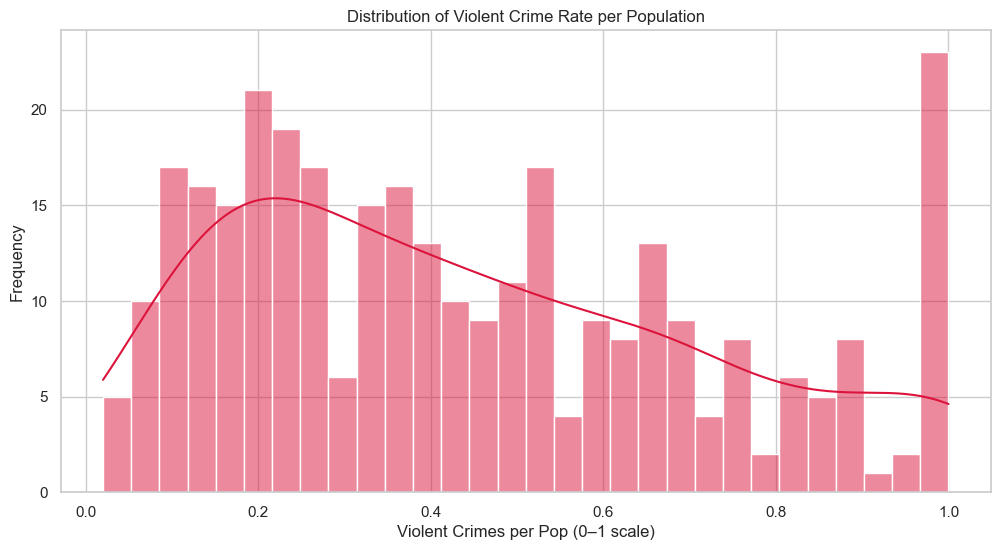

In [70]:
target = 'ViolentCrimesPerPop'

sns.histplot(df[target], bins=30, kde=True, color='crimson')
plt.title('Distribution of Violent Crime Rate per Population')
plt.xlabel('Violent Crimes per Pop (0–1 scale)')
plt.ylabel('Frequency')
plt.show()


The target variable for this analysis is **`ViolentCrimesPerPop`**, which represents the per capita violent crime rate in each community, normalized on a scale from 0 to 1.

To understand the distribution of this variable, I plotted **a histogram with a Kernel Density Estimate (KDE) overlay**. The histogram shows that most communities have a relatively low violent crime rate, with a right-skewed distribution indicating fewer communities with high crime rates. This visualization helps confirm the variability of violent crime across the dataset and provides insight into the prevalence of violent crime in U.S. communities.


#### Step 5: Correlation Analysis

In [58]:
corr = df.corr()
top_corr = corr[target].sort_values(ascending=False)

# top 10 positive correlations (excluding target)
print("Top 10 features most positively correlated with crime:")
print(top_corr[1:11])

# top 10 negative correlations
print("\nTop 10 features most negatively correlated with crime:")
print(top_corr[-10:])


Top 10 features most positively correlated with crime:
PctIlleg            0.729064
racepctblack        0.658591
PctPopUnderPov      0.615753
pctWPubAsst         0.581427
PctUnemployed       0.548039
TotalPctDiv         0.546010
PctPolicBlack       0.543545
FemalePctDiv        0.538270
PctVacantBoarded    0.535983
PctHousNoPhone      0.534196
Name: ViolentCrimesPerPop, dtype: float64

Top 10 features most negatively correlated with crime:
RacialMatchCommPol   -0.457834
PctPersOwnOccup      -0.462082
medIncome            -0.525707
medFamInc            -0.526517
pctWInvInc           -0.615921
PctYoungKids2Par     -0.696151
racePctWhite         -0.698964
PctTeen2Par          -0.700793
PctFam2Par           -0.741250
PctKids2Par          -0.758904
Name: ViolentCrimesPerPop, dtype: float64


### Correlation Analysis Summary

The correlation analysis revealed strong positive relationships between several socioeconomic factors and violent crime rates. Features such as the percentage of children born to unmarried women (`PctIlleg`), the proportion of Black residents (`racepctblack`), and the percentage of the population living under the poverty line (`PctPopUnderPov`) emerged as top predictors. Other highly correlated variables included unemployment rate, public assistance (`pctWPubAsst`), the percentage of divorced individuals (`TotalPctDiv`, `FemalePctDiv`), and housing issues like vacant or boarded homes and lack of phone service. These indicators reflect economic hardship and social instability, both of which appear closely linked to higher violent crime rates across U.S. communities.

Conversely, factors that were negatively correlated with violent crime included family stability (`PctKids2Par`, `PctFam2Par`, `PctTeen2Par`), higher income levels (`medIncome`, `medFamInc`), and indicators of economic opportunity such as investment income (`pctWInvInc`). Communities with more two-parent households, higher homeownership (`PctPersOwnOccup`), and higher proportions of White residents (`racePctWhite`) tended to show lower crime rates. These results highlight the protective influence of income, education, and family structure, offering meaningful insights into the root causes of community-level violence.


#### Step 6: Heat Map of 10 correlated features

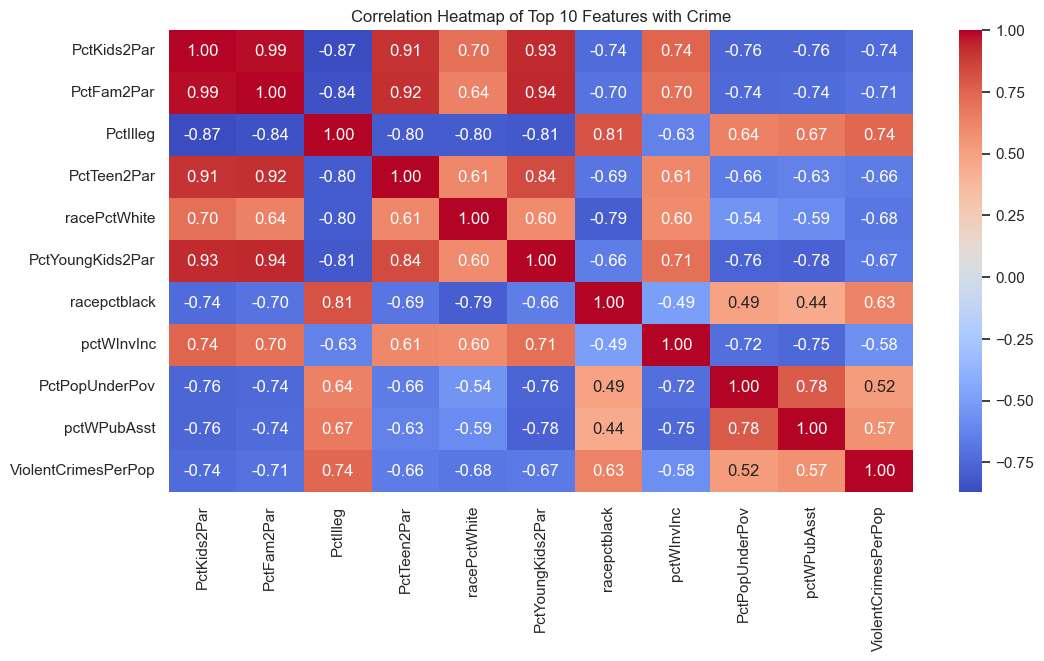

In [32]:
top_features = top_corr.abs().sort_values(ascending=False)[1:11].index.tolist()
sns.heatmap(df[top_features + [target]].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 10 Features with Crime')
plt.show()


#### Heatmap Summary

The heatmap visualizes the correlation between key socioeconomic features and the violent crime rate (`ViolentCrimesPerPop`) across U.S. communities. Features like **PctIlleg** (percentage of births to unmarried women) show a strong positive correlation (0.73) with violent crime, indicating higher crime rates in areas with more single-parent births. Conversely, features related to family stability, such as **PctKids2Par** and **PctFam2Par** (percentage of children living in two-parent families), exhibit strong negative correlations (around -0.74 to -0.76), suggesting that family structure plays a protective role against violent crime. Other notable negative correlations include the percentage of young teens in two-parent households and the percentage of white residents, reflecting the complex social dynamics influencing crime rates.

This heatmap highlights how socioeconomic and demographic factors interact with crime, offering valuable insights for targeted community interventions and policy-making.


#### Step 7(a): Simple Linear Regression Model

Simple Linear Regression Results
Coefficient (slope): 0.7112148290441037
Intercept: 0.1287511284653322
R² score: 0.552426316334348
MSE: 0.03215288045890409


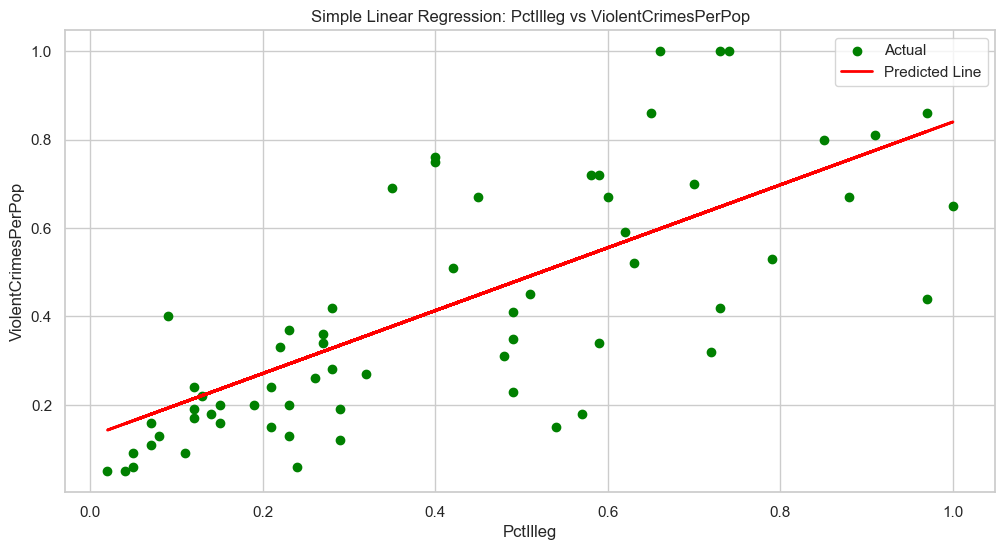

In [71]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

feature = 'PctIlleg' 
target = 'ViolentCrimesPerPop'

# Prepare X and y
X = df[[feature]]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Simple Linear Regression Results")
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualize
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel(feature)
plt.ylabel(target)
plt.title(f'Simple Linear Regression: {feature} vs {target}')
plt.legend()
plt.show()


To understand how a single feature influences the target variable, I started with a **Simple Linear Regression** model. Simple linear regression is a statistical method that models the relationship between one independent variable (feature) and one dependent variable (target) by fitting a straight line to the data. It helps to see how changes in the feature predict changes in the target.

In this case, I examined the feature **`PctIlleg`** (percentage of births to unmarried women) and its effect on the target variable **`ViolentCrimesPerPop`** (violent crime rate per population). The data was split into training and testing sets to evaluate the model’s performance on unseen data.

Key outputs from the model: 

- **Coefficient (slope):** 0.7112 (indicates the strength and direction of the relationship)
- **Intercept:** 0.1288   (represents the predicted violent crime rate when the percentage of births to unmarried women (PctIlleg) is zero)
- **R² score:** 0.5524 (shows how much variance in the target is explained by the feature)
- **MSE:** 0.0322 (measures prediction accuracy )

The accompanying scatter plot displays the actual violent crime rates against the predicted values on the test data, with the regression line illustrating the positive linear relationship between `PctIlleg` and violent crime rate. This suggests that as the percentage of births to unmarried women increases, the violent crime rate also tends to increase in the communities studied.


#### Step 7(b): Multiple Linear Regression Model


Multiple Linear Regression Results
R² Score: 0.651
RMSE: 0.158

Top 15 Feature Coefficients:
TotalPctDiv         0.450629
PctYoungKids2Par    0.276493
PctIlleg            0.100726
PctVacantBoarded    0.079140
PctUnemployed       0.057253
PctPopUnderPov      0.011369
PctTeen2Par        -0.010257
PctPolicBlack      -0.028465
pctWPubAsst        -0.065652
racepctblack       -0.126753
FemalePctDiv       -0.208310
pctWInvInc         -0.209934
PctKids2Par        -0.344595
racePctWhite       -0.364277
PctFam2Par         -0.366097
dtype: float64


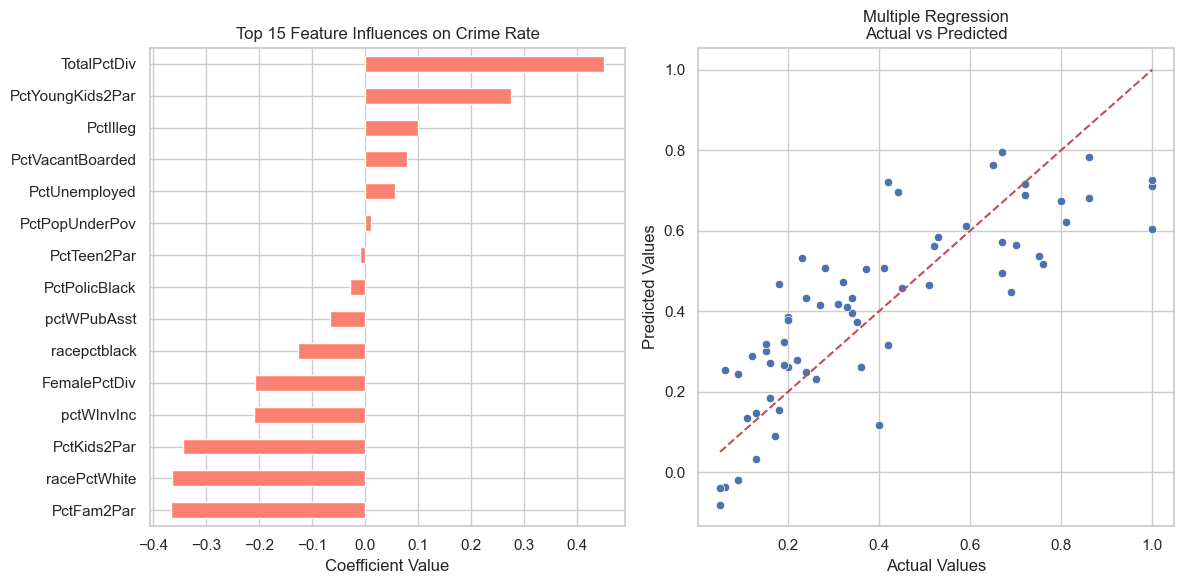

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 1. Select top features
top_features = top_corr.abs().sort_values(ascending=False)[1:16].index.tolist()

X_multi = df_clean[top_features]
y_multi = df_clean[target]

# 2. Split the data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# 3. Train the model
multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)

# 4. Predict
y_pred_m = multi_model.predict(X_test_m)

# 5. Evaluate
r2_m = r2_score(y_test_m, y_pred_m)
rmse_m = np.sqrt(mean_squared_error(y_test_m, y_pred_m))

print("\nMultiple Linear Regression Results")
print(f"R² Score: {r2_m:.3f}")
print(f"RMSE: {rmse_m:.3f}")

# 6. Coefficient analysis
coefficients = pd.Series(multi_model.coef_, index=X_multi.columns).sort_values(ascending=False)
print("\nTop 15 Feature Coefficients:")
print(coefficients.head(15))

# Left: Top 15 coefficients
plt.subplot(1, 2, 1)
coefficients.head(15).plot(kind='barh', color='salmon')
plt.title('Top 15 Feature Influences on Crime Rate')
plt.xlabel('Coefficient Value')
plt.gca().invert_yaxis()

# Right: Actual vs Predicted
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_m, y=y_pred_m)
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--')
plt.title('Multiple Regression\nActual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


#### Multiple Linear Regression Analysis

After performing a **Simple Linear Regression** using only `PctIlleg` (percentage of births to unmarried women), which yielded an **R² score of 0.552**, it became clear that violent crime rates are influenced by more than just one factor. This prompted the need for a **Multiple Linear Regression** approach to capture the combined effect of multiple socioeconomic variables.

For a more comprehensive understanding, I applied **Multiple Linear Regression** using the top 15 features most correlated with violent crime rates. The data was then split into training and testing sets (80%-20%).

The model achieved an **R² score of 0.651**, indicating that approximately 65.1% of the variance in violent crime rates can be explained by the selected socioeconomic factors. The RMSE (Root Mean Squared Error) was **0.158**, reflecting the average prediction error magnitude.

**The bar chart** of coefficients reveals the influence of features on crime rates. The strongest positive predictor was `TotalPctDiv` (percentage of divorced individuals), followed by `PctYoungKids2Par` (percent of young kids in two-parent households) and `PctIlleg` (percent births to unmarried women). Some features, such as `racepctblack`,`racepctwhite`, `PctFam2Par`,`pctWPubAsst` (percent receiving public assistance) etc, showed negative coefficients, indicating a more complex relationship.

**The scatter plot** comparing actual vs. predicted crime rates demonstrates that the model’s predictions closely follow the actual values, with points clustering near the ideal 45-degree line, confirming good model fit and predictive accuracy.


#### Step 7(c): Check for Multicollinearity using Variance Inflation Factor (VIF)

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[top_features]  
X = X.dropna()  

# Add a constant term (needed for VIF)
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Show result
print(vif_data)


             Feature         VIF
0              const  756.859221
1        PctKids2Par   68.656204
2         PctFam2Par   68.429721
3           PctIlleg   11.797052
4        PctTeen2Par   13.428080
5       racePctWhite    7.121712
6   PctYoungKids2Par   18.050836
7       racepctblack    8.711624
8         pctWInvInc    4.775955
9     PctPopUnderPov    4.574210
10       pctWPubAsst    6.095198
11     PctUnemployed    4.974930
12       TotalPctDiv   48.713178
13     PctPolicBlack    3.624745
14      FemalePctDiv   44.071610
15  PctVacantBoarded    2.279851


#### Variance Inflation Factor (VIF) and Multicollinearity Analysis

**Variance Inflation Factor (VIF)** is a diagnostic tool used to detect **multicollinearity**—a situation where independent variables in a regression model are highly correlated with one another. Multicollinearity can inflate the variance of coefficient estimates, making it difficult to determine the individual effect of each predictor on the target variable.

During the **Multiple Linear Regression** analysis, an important observation emerged:

>Although `PctYoungKids2Par` was initially identified as **negatively correlated** with `ViolentCrimesPerPop` in the correlation analysis, the regression model assigned it a **positive coefficient**.

This contradiction suggested the presence of multicollinearity, where overlapping information between predictors could be distorting the direction and strength of individual coefficients.

To investigate further, I computed the **VIF values** for all selected predictors. Several features showed **high VIF scores**, confirming the existence of multicollinearity within the model.

| VIF Value  | Interpretation                                                    |
|------------|-------------------------------------------------------------------|
| **1**      | No multicollinearity                                              |
| **1 – 5**  | Moderate correlation, typically acceptable                        |
| **5 – 10** | Concerning multicollinearity — further inspection recommended     |
| **> 10**   | Severe multicollinearity — likely problematic and needs attention |

These findings highlight the importance of addressing multicollinearity before making inferences from model coefficients. As a next step, I will employ **Ridge Regression**, a regularized model that can effectively mitigate multicollinearity by shrinking the influence of correlated features.


#### Step 7(d) Ridge Regression Model

Ridge Regression Results
R-squared: 0.654
RMSE: 0.158


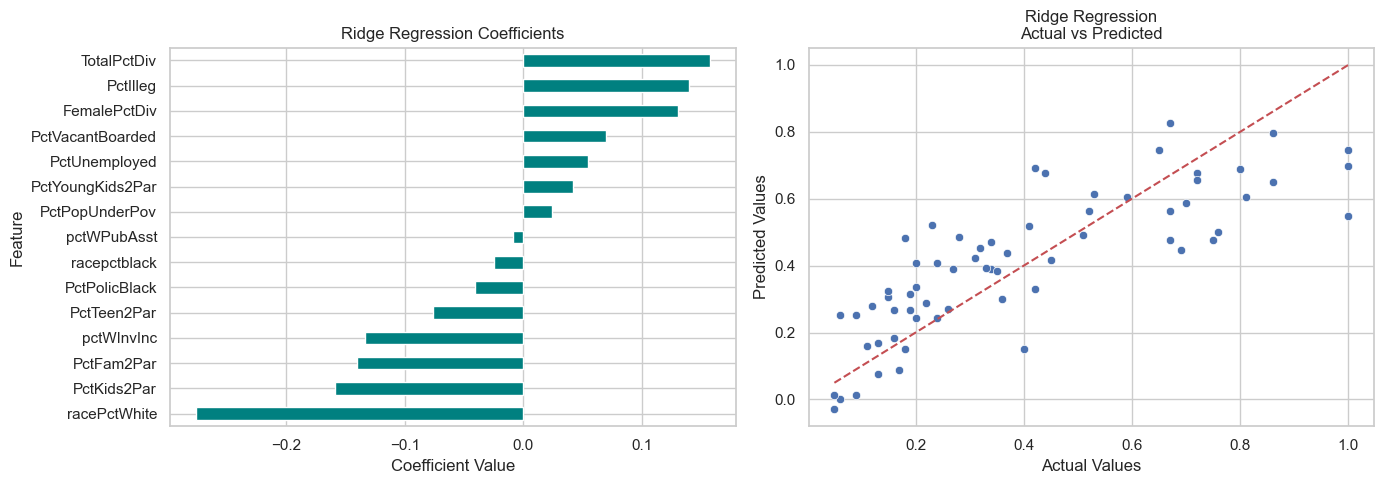

In [38]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data
X = df[top_features].dropna()
y = df.loc[X.index, 'ViolentCrimesPerPop']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict
y_pred = ridge_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Ridge Regression Results")
print(f"R-squared: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

# Coefficients
coefficients = pd.Series(ridge_model.coef_, index=X.columns).sort_values()

# Combined plots
plt.figure(figsize=(14, 5))

# Plot 1: Coefficient Bar Chart
plt.subplot(1, 2, 1)
coefficients.plot(kind='barh', color='teal')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

# Plot 2: Actual vs Predicted
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Ridge Regression\nActual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


#### Ridge Regression Analysis

To improve model robustness and address **multicollinearity** among the predictors, I implemented a **Ridge Regression model**, which introduces **L2 regularization**. This technique penalizes large coefficients, helping to stabilize predictions and reduce overfitting, especially when features are correlated.

The model was trained using the previously selected top 15 features most correlated with `ViolentCrimesPerPop`. After cleaning the data and splitting it into training and testing sets (80%-20%), the Ridge model was fitted with an `alpha` value of 1.0. The results were promising, achieving an **R² score of 0.654** and a **Root Mean Squared Error (RMSE)** of **0.157**, closely matching the performance of standard multiple linear regression.

**The horizontal bar chart** of the Ridge coefficients reveals which features had the strongest influence on the model:
- Positive coefficients such as `TotalPctDiv` and `PctIlleg` indicate a direct relationship with crime rates while `PctKids2Par` and `racePctWhite` indicates an indirect relationship with the crime rates.
- Regularization pushed less influential coefficients closer to zero, which helps reduce noise from irrelevant or redundant features.

**The scatter plot** compares actual and predicted values , showing a strong alignment along the ideal diagonal line, demonstrating good predictive performance. The clustering of points near the line indicates that the Ridge model generalizes well to unseen data.

Overall, Ridge Regression proved to be an effective and stable modeling choice, especially in the presence of correlated predictors, maintaining accuracy while reducing overfitting risks.



### Comparative Analysis of Regression Models

The table below summarizes the performance metrics of three regression approaches—*Simple Linear Regression*, *Multiple Linear Regression*, and *Ridge Regression*—used to predict violent crime rates based on socioeconomic indicators:

| **Model**                    | **R² Score** | **MSE**    | **RMSE**   |
|-----------------------------|--------------|------------|------------|
| Ridge Regression            | 0.654        | 0.02496    | 0.158      |
| Multiple Linear Regression  | 0.651        | 0.02504    | 0.1583     |
| Simple Linear Regression    | 0.552        | 0.03215    | 0.1793     |

The **R² score** indicates the proportion of variance in violent crime rates explained by each model, while **MSE (Mean Squared Error)** and **RMSE (Root Mean Squared Error)** measure prediction error.

##### Key Insights:
- **Ridge Regression** achieved the highest R² score and the lowest RMSE, suggesting the best predictive performance among the three.
- **Multiple Linear Regression** also performed well, but slightly under Ridge due to the impact of multicollinearity.
- **Simple Linear Regression**, while useful for exploring individual relationships, proved less effective at capturing the complexity of the data.

These results validate the benefit of using regularization (Ridge) when dealing with multiple predictors, especially in the presence of multicollinearity.


### Conclusion

This analysis investigated the relationship between socio-economic factors and violent crime rates using the UCI Communities and Crime dataset. After thorough data cleaning and correlation analysis, key predictors such as PctUnemployed, PctYoungKids2Par, PctIlleg, and TotalPctDiv emerged as strongly associated with higher violent crime rates, reflecting economic hardship and family instability within communities.

By applying simple, multiple, and ridge regression models, the study demonstrated that a combination of socio-economic variables can explain up to 65% of the variance in violent crime rates, with ridge regression effectively addressing multicollinearity issues.

Overall, the findings confirm that violent crime in U.S. communities is influenced by multiple interconnected socio-economic factors, emphasizing the importance of comprehensive approaches to crime prevention that consider underlying social and economic conditions.


### Reflective Note

Working on this project has been an eye-opening experience, allowing me to practically apply various data analysis and machine learning techniques to a real-world societal issue—violent crime. Each step, from handling raw data and dealing with missing values to implementing regression models and interpreting their results, deepened my understanding of the data science pipeline and the importance of context in model interpretation.

One of the most valuable takeaways was learning how multicollinearity can distort model insights, even when the predictors appear strongly correlated with the target. Exploring Ridge Regression helped me realize the significance of regularization in producing stable and meaningful models, especially when working with socio-demographic data where variables often overlap in meaning and influence.

Beyond technical skills, this project strengthened my ability to communicate complex findings clearly and support them with visualizations and metrics. It reminded me that behind every dataset are real communities and individuals, and that ethical, well-informed analysis can contribute to more data-driven and socially conscious decision-making.

This experience has not only enhanced my analytical toolkit but also reaffirmed my interest in using data to understand and address societal challenges.

In future, I am interested to use non linear models for the same kind of complex datasets. I also want to convert this project into a stremlit app where users can predict crime rates accross various communities by using different variables. For that, I wish myself best of luck:)

## References

- Redmond, Michael. (2009). *Communities and Crime Dataset*. UCI Machine Learning Repository. Retrieved from https://archive.ics.uci.edu/ml/datasets/communities+and+crime

- U.S. Census Bureau. (1990). *1990 Census Data*. Washington, D.C.

- FBI Uniform Crime Report (UCR). (1995). *Crime in the United States*. Federal Bureau of Investigation.

- Law Enforcement Management and Administrative Statistics (LEMAS). (1990). U.S. Department of Justice.

- Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011. https://scikit-learn.org

---

